# Imports

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
project_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_path)

from src.visualization.utils import positions_visualization, spearman_tau_visualization, tau_visualization  # noqa: E402
from src.calculations.utils import spearman_tau_table, generate_spearman_tau, spearman_tau_from_tables
from src.calculations.power_law import TauPowerLaw
from src.calculations.transition_table import calculate_transitions_history

# Test with 1 Season - 2016/2017

In [3]:
table_2017 = pd.read_csv(os.path.join('..', 'data', 'PremierLeague', '2016.csv'))
table_2017 = table_2017.drop(columns=['Unnamed: 0'])

In [4]:
table_2017.head()

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,Club
0,1,2,3,4,7,6,6,7,7,8,...,6,6,6,6,6,6,6,6,6,Man Utd
1,2,11,11,6,6,4,4,4,3,3,...,3,4,3,3,4,4,4,4,4,Liverpool
2,3,1,1,1,1,1,1,1,1,1,...,4,5,4,4,3,3,3,3,3,Man City
3,4,4,2,2,5,8,7,5,4,4,...,1,1,1,1,1,1,1,1,1,Chelsea
4,5,3,5,8,12,14,15,16,18,18,...,18,17,17,17,17,17,18,18,18,Hull City


In [5]:
table_2017[['Club', '38']].sort_values('38')

,Club,38
3,Chelsea,1
7,Tottenham,2
2,Man City,3
1,Liverpool,4
13,Arsenal,5
0,Man Utd,6
10,Everton,7
8,Southampton,8
19,Bournemouth,9
6,West Brom,10


In [6]:
liverpool_table = table_2017[table_2017['Club'] == 'Liverpool']

In [7]:
liverpool_table.head()

,1,2,3,4,5,6,7,8,9,10,...,30,31,32,33,34,35,36,37,38,Club
1,2,11,11,6,6,4,4,4,3,3,...,3,4,3,3,4,4,4,4,4,Liverpool


In [8]:
print(liverpool_table.columns.to_list()[:-1])
print([int(pos) for pos in liverpool_table.iloc[0].to_list()[:-1]])

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']
[2, 11, 11, 6, 6, 4, 4, 4, 3, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 4, 4, 5, 5, 5, 5, 5, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4]


## Positions evo line plot

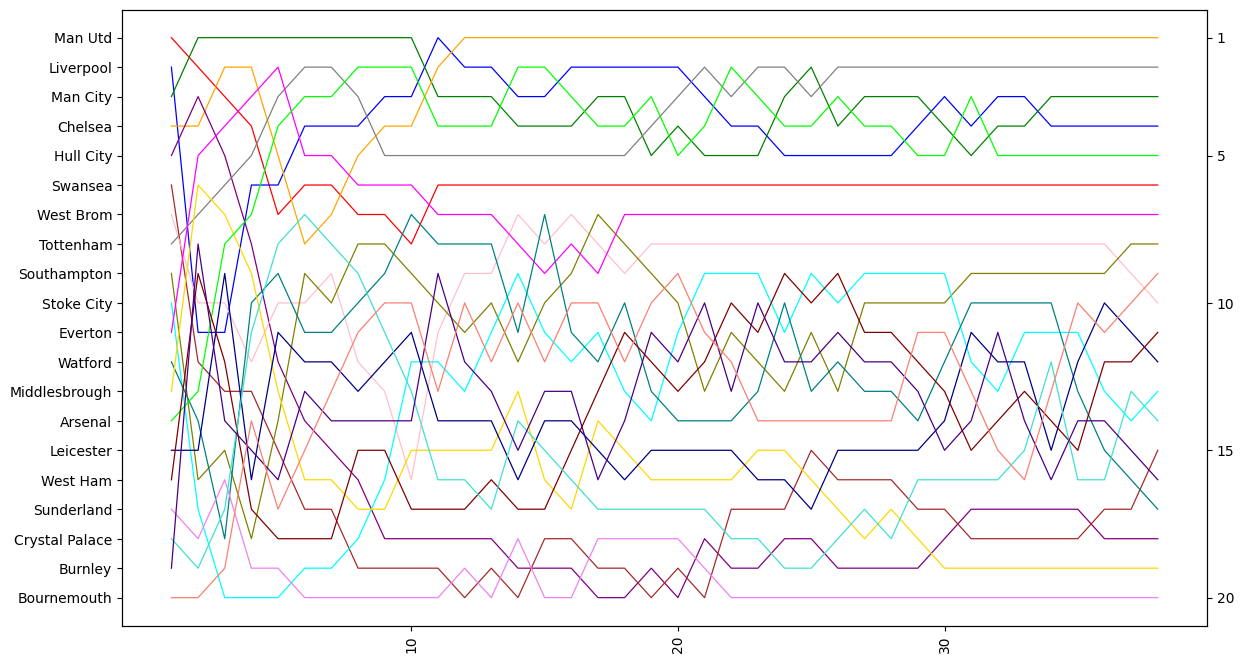

In [9]:
positions_visualization(table_2017)

## Spearman Correlation and Tau Distance Plot

In [10]:
table_2017['1'].to_list()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [11]:
table_2017['38'].to_list()

[6, 4, 3, 1, 18, 15, 10, 2, 8, 13, 7, 17, 19, 5, 12, 11, 20, 14, 16, 9]

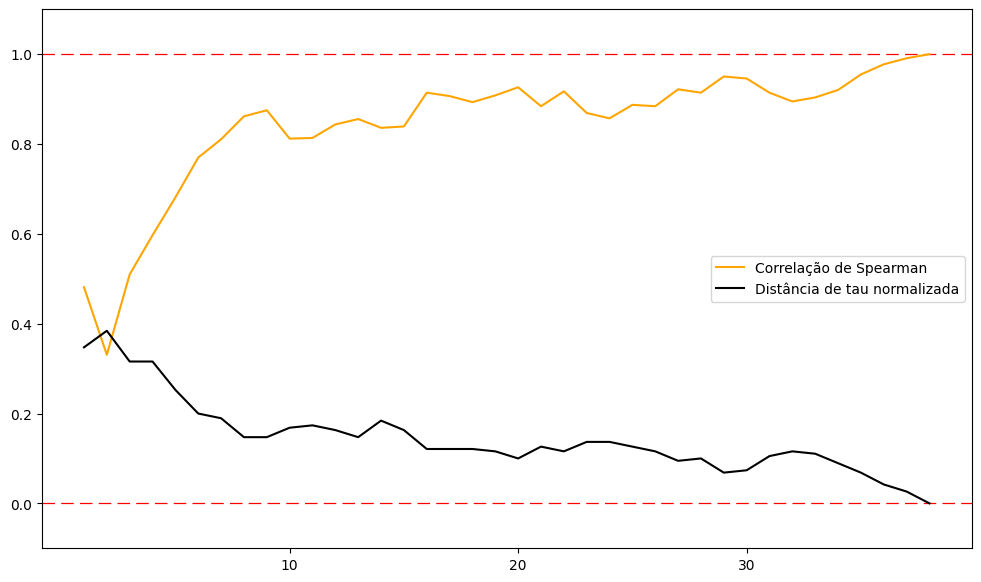

In [12]:
spearman_tau_visualization(table_2017, fig_size=(12,7))

# Random Baseline

In [13]:
mean_spearman, mean_tau = generate_spearman_tau()

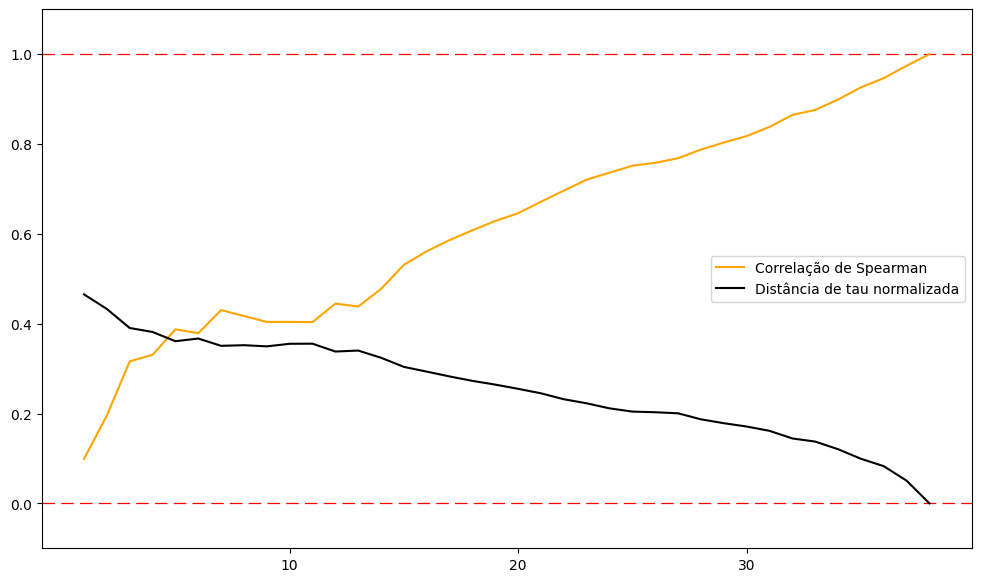

In [14]:
spearman_tau_visualization(None, fig_size=(12,7), plot_points=(mean_spearman, mean_tau))

# Tau Visualization for Premier League

In [15]:
pl_list = [os.path.join('..', 'data', 'PremierLeague', path) for path in os.listdir(os.path.join('..', 'data', 'PremierLeague'))]
years_table_list = []
for path in pl_list:
    year_table_df = pd.read_csv(path)
    year_table_df = year_table_df.drop(columns=['Unnamed: 0'])
    years_table_list.append(year_table_df)

_, tau_mean_pl = spearman_tau_from_tables(years_table_list)

In [16]:
_, mean_tau_random = generate_spearman_tau()

In [17]:
power_law_1 = TauPowerLaw(power_coefficient=-0.672, multiplier_coefficient=0.318)
power_law_2 = TauPowerLaw(power_coefficient=-0.430, multiplier_coefficient=0.258)

power_law_1_points = power_law_1.taus_distances(1, 38)
power_law_2_points = power_law_2.taus_distances(1, 38)

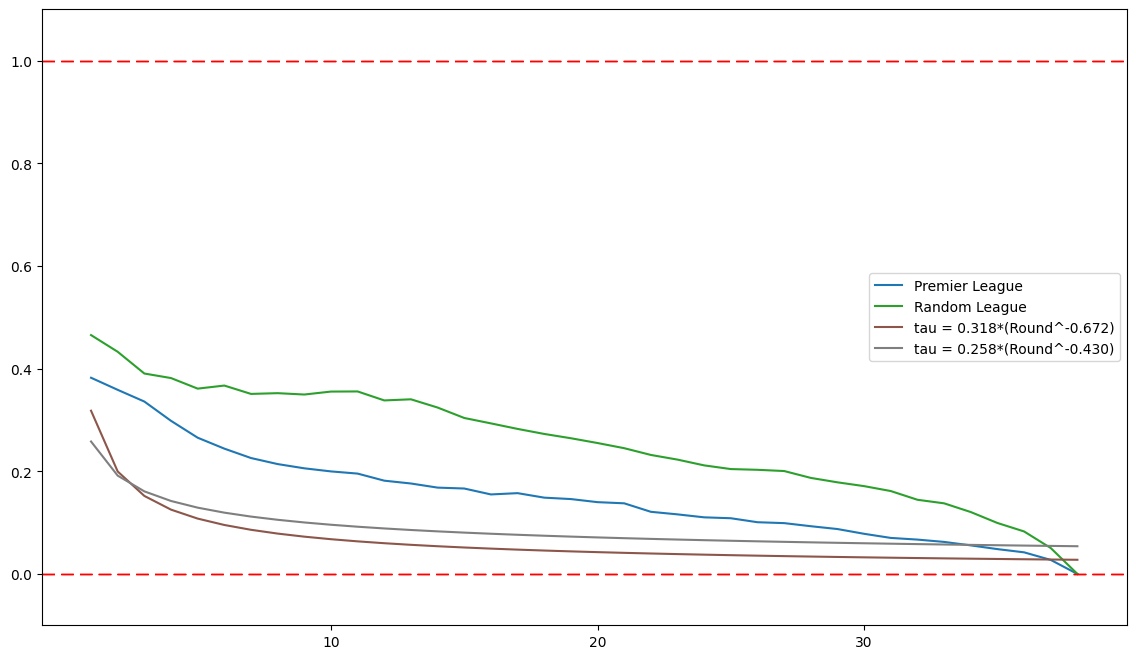

In [18]:
tau_visualization([tau_mean_pl, mean_tau_random, power_law_1_points, power_law_2_points], labels=['Premier League', 'Random League', 'tau = 0.318*(Round^-0.672)', 'tau = 0.258*(Round^-0.430)'])

# Final Standing Transition Probabilities

In [19]:
pl_list = [os.path.join('..', 'data', 'PremierLeague', path) for path in os.listdir(os.path.join('..', 'data', 'PremierLeague'))]
years_table_list = []
for path in pl_list:
    year_table_df = pd.read_csv(path)
    year_table_df = year_table_df.drop(columns=['Unnamed: 0'])
    years_table_list.append(year_table_df)

In [20]:
transition_table_df_10_38 = calculate_transitions_history(years_table_list)

In [21]:
transition_table_df_10_38.head(20)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.428571,0.190476,0.095238,0.095238,0.142857,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.142857,0.333333,0.333333,0.047619,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.142857,0.285714,0.095238,0.285714,0.047619,0.000000,0.047619,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.142857,0.000000,0.142857,0.190476,0.095238,0.190476,0.095238,0.047619,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.142857,0.047619,0.047619,0.047619,0.095238,0.095238,0.095238,0.095238,0.142857,0.047619,0.095238,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.095238,0.095238,0.047619,0.095238,0.095238,0.047619,0.142857,0.095238,0.047619,0.047619,0.095238,0.047619,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000
7,0.000000,0.047619,0.095238,0.047619,0.142857,0.095238,0.000000,0.000000,0.047619,0.000000,0.047619,0.047619,0.095238,0.095238,0.095238,0.095238,0.047619,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.047619,0.000000,0.095238,0.190476,0.190476,0.095238,0.047619,0.095238,0.047619,0.095238,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.047619,0.047619,0.095238,0.095238,0.095238,0.000000,0.142857,0.095238,0.047619,0.000000,0.047619,0.047619,0.095238,0.000000,0.047619,0.095238,0.000000
10,0.000000,0.000000,0.000000,0.142857,0.047619,0.047619,0.095238,0.095238,0.095238,0.047619,0.047619,0.047619,0.000000,0.047619,0.000000,0.238095,0.000000,0.047619,0.000000,0.000000


In [22]:
transition_table_df_20_38 = calculate_transitions_history(years_table_list, init_round=20, final_round=38)
transition_table_df_20_38.head(20)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.571429,0.190476,0.142857,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.238095,0.333333,0.142857,0.238095,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.142857,0.238095,0.285714,0.238095,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.190476,0.190476,0.190476,0.047619,0.095238,0.190476,0.047619,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.047619,0.047619,0.095238,0.190476,0.333333,0.047619,0.095238,0.000000,0.095238,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.142857,0.047619,0.428571,0.238095,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.142857,0.047619,0.190476,0.095238,0.095238,0.142857,0.142857,0.047619,0.000000,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.190476,0.238095,0.190476,0.047619,0.000000,0.047619,0.047619,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190476,0.238095,0.047619,0.047619,0.000000,0.285714,0.095238,0.047619,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.047619,0.000000,0.142857,0.000000,0.142857,0.142857,0.095238,0.047619,0.000000,0.095238,0.000000,0.095238,0.142857,0.047619,0.000000,0.000000,0.000000


In [23]:
transition_table_df_30_38 = calculate_transitions_history(years_table_list, init_round=30, final_round=38)
transition_table_df_30_38.head(20)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.857143,0.095238,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.142857,0.571429,0.238095,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.285714,0.571429,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.047619,0.142857,0.619048,0.142857,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.142857,0.380952,0.238095,0.190476,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.047619,0.333333,0.380952,0.095238,0.095238,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.142857,0.238095,0.190476,0.142857,0.047619,0.047619,0.095238,0.000000,0.000000,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.142857,0.333333,0.190476,0.095238,0.047619,0.047619,0.095238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.238095,0.095238,0.285714,0.142857,0.095238,0.047619,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047619,0.047619,0.190476,0.285714,0.142857,0.095238,0.142857,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
